<a href="https://colab.research.google.com/github/Gauthampharish/OCR/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import Dense, Flatten, Softmax

print(tf.__version__)

2.14.0


In [2]:
!pip install emnist



In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import emnist

In [4]:
from emnist import extract_training_samples
train_images, train_labels = extract_training_samples('byclass')



In [5]:
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('byclass')


In [6]:
train_images = tf.keras.utils.normalize(train_images, axis = 1)
test_images = tf.keras.utils.normalize(test_images, axis = 1)

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [7]:
rotation_range_val = 15
width_shift_val = 0.10
height_shift_val = 0.10

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range = rotation_range_val,
                             width_shift_range = width_shift_val,
                             height_shift_range = height_shift_val)

In [9]:
train_datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(62, activation = 'softmax')
])

In [12]:

val_datagen = ImageDataGenerator()
val_datagen.fit(test_images.reshape(test_images.shape[0], 28, 28, 1))
val_datagen

In [13]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=1024),
         validation_data= val_datagen.flow(test_images, test_labels,
         batch_size=32), epochs= 20)

Epoch 1/20
682/682 [==============================] - 258s 358ms/step - loss: 1.0564 - accuracy: 0.6910 - val_loss: 0.4895 - val_accuracy: 0.8279
Epoch 2/20
682/682 [==============================] - 231s 339ms/step - loss: 0.5505 - accuracy: 0.8106 - val_loss: 0.4245 - val_accuracy: 0.8467
Epoch 3/20
682/682 [==============================] - 238s 349ms/step - loss: 0.4931 - accuracy: 0.8272 - val_loss: 0.3979 - val_accuracy: 0.8548
Epoch 4/20
682/682 [==============================] - 232s 339ms/step - loss: 0.4638 - accuracy: 0.8349 - val_loss: 0.3907 - val_accuracy: 0.8542
Epoch 5/20
682/682 [==============================] - 234s 343ms/step - loss: 0.4446 - accuracy: 0.8404 - val_loss: 0.3845 - val_accuracy: 0.8579
Epoch 6/20
682/682 [==============================] - 239s 351ms/step - loss: 0.4312 - accuracy: 0.8440 - val_loss: 0.3792 - val_accuracy: 0.8596
Epoch 7/20
682/682 [==============================] - 238s 350ms/step - loss: 0.4201 - accuracy: 0.8473 - val_loss: 0.3712 -

In [15]:
from tensorflow.keras.models import load_model, save_model

# Save the model
model.save("eminst.keras")

In [16]:
scores = model.evaluate(test_images,test_labels)
print("Accuracy: %.2f%%"%(scores[1]*100))

3636/3636 [==============================] - 14s 4ms/step - loss: 0.3446 - accuracy: 0.8687
Accuracy: 86.87%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


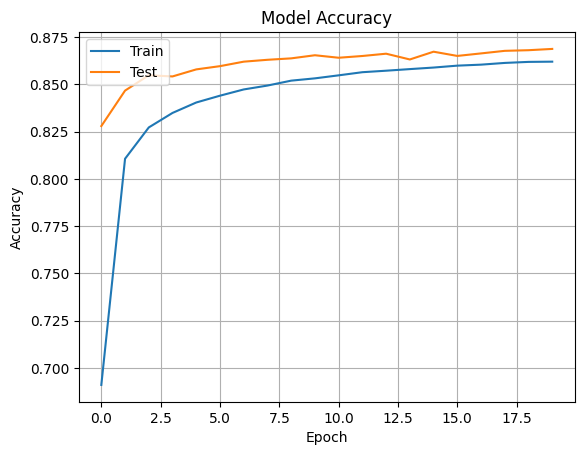

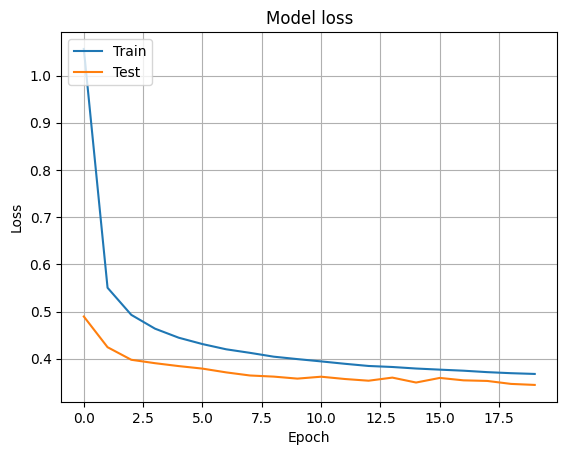

In [17]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()